## EDA

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Data

In [6]:
produtos = pd.read_excel("produtos.xlsx")
produtos.head(5)

,ID,Name,Size
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
1,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M
2,00066f42aeeb9f3007548bb9d3f33c383,Capitão América,G
3,00088930e925c41fd95ebfe695fd26551,Thor,P
4,00088930e925c41fd95ebfe695fd26552,Thor,M


In [7]:
vendas = pd.read_excel('vendas.xlsx')
vendas.head(5)

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21


In [8]:
consumidores = pd.read_excel("consumidores.xlsx")
consumidores.head(5)

,ID,City,State,DateOfBirth,Sex
0,14001,Curitiba,PR,1985-06-28,Homem
1,14002,Florianópolis,SC,1987-01-10,Homem
2,14003,Rio de Janeiro,RJ,1979-11-05,Homem
3,14004,Rio de Janeiro,RJ,1983-11-25,Mulher
4,14005,Florianópolis,SC,1969-04-07,Homem


In [9]:
lojas = pd.read_excel("lojas.xlsx")
lojas.head(10)

,ID,Name,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP
5,9,Belo Horizonte,MG
6,22,Online,na


#### Profile

In [ ]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [ ]:
profile = ProfileReport(vendas, title='Sales Profile', html={'style': {'full_width': True}}, sort=None)
profile.to_notebook_iframe()

### Products

In [ ]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      73 non-null     object
 1   Name    73 non-null     object
 2   Size    73 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [ ]:
print('Número de Variações de Produtos (Nome + Tamanho): ', produtos['ID'].nunique())
print('Produtos: ', produtos['Name'].nunique(),produtos['Name'].unique())
print('Tamanhos: ', produtos['Size'].unique())

Número de Variações de Produtos (Nome + Tamanho):  73
Produtos:  24 ['Capitão América' 'Thor' 'Deadpool' 'Pantera Negra' 'Batman' 'Flash'
 'Coringa' 'Mulher-Maravilha' 'Thanos' 'Wolverine' 'Capitã Marvel'
 'Naruto' 'Pokemon Go Squirtle' 'Super Mario' 'BIXDream' 'Tempestade'
 'Ciclope' 'Dragon Ball Z' 'Darth Vader' 'Iron Man' 'Bazinga'
 'League Legends' 'Rick Morty' 'Homer Simpsons']
Tamanhos:  ['P' 'M' 'G' 'GG']


### Sales

In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32753 entries, 0 to 32752
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         32753 non-null  object        
 1   ProductID  32753 non-null  object        
 2   ClientID   32753 non-null  int64         
 3   Discount   32753 non-null  float64       
 4   UnitPrice  32753 non-null  float64       
 5   Quantity   32753 non-null  int64         
 6   StoreID    32753 non-null  int64         
 7   Date       32753 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.0+ MB


In [ ]:
vendas.describe()

,ClientID,Discount,UnitPrice,Quantity,StoreID
count,32753.000000,32753.000000,32753.000000,32753.000000,32753.000000
mean,21225.185937,0.093012,221.644967,1.058651,3.752389
std,4262.194113,0.009536,112.535304,0.239606,3.827504
min,14001.000000,0.080000,114.800000,1.000000,1.000000
25%,17544.000000,0.080000,161.000000,1.000000,1.000000
50%,21130.000000,0.100000,204.400000,1.000000,3.000000
75%,24916.000000,0.100000,233.800000,1.000000,4.000000
max,28695.000000,0.100000,686.000000,3.000000,22.000000


In [ ]:
print('Número de Vendas: ', vendas['ID'].nunique())

Número de Vendas:  32753


#### Products

In [ ]:
# Produto mais vendido
vendas.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)

ProductID
002ec297b1b00fb9dde7ee6ac24b67713    1020
002d4ea7c04739c130bb74d7e7cd16943    1018
0009406fd7479715e4bef61dd91f24623     998
001c5d71ac6ad696d22315953758fa043     996
0011c512eb256aa0dbbb544d8dffcf6e3     996
                                     ... 
002c6dab60557c48cfd6c2222ef7fd762     216
00210e41887c2a8ef9f791ebc780cc362     214
002552c0663708129c0019cc97552d7d2     214
00088930e925c41fd95ebfe695fd26552     211
001b237c0e9bb435f2e54071129237e92     201
Name: Quantity, Length: 73, dtype: int64

In [ ]:
print(produtos[produtos['ID'] == '002ec297b1b00fb9dde7ee6ac24b67713'])

                                   ID     Name Size
62  002ec297b1b00fb9dde7ee6ac24b67713  Bazinga    G


#### Clients

In [ ]:
# Cliente que comprou mais produtos
vendas.groupby('ClientID')['Quantity'].sum().sort_values(ascending=False)

ClientID
26177    11
16610    10
22056    10
17631     9
17516     9
         ..
23311     1
23310     1
23308     1
16844     1
28695     1
Name: Quantity, Length: 13650, dtype: int64

#### Stores

In [ ]:
# Loja que mais vendeu
vendas.groupby('StoreID')['Quantity'].sum().sort_values(ascending=False)

StoreID
1     8734
2     7224
3     6516
4     5481
7     3794
9     1956
22     969
Name: Quantity, dtype: int64

In [ ]:
# Loja que mais vendeu produtos mais caros
vendas.groupby('StoreID')['UnitPrice'].sum().sort_values(ascending=False)

StoreID
1     1828556.8
2     1501899.0
3     1364245.4
4     1157403.8
7      792335.6
9      409708.6
22     205388.4
Name: UnitPrice, dtype: float64

In [ ]:
lojas[lojas['ID'] == 1]

,ID,Name,State
0,1,Florianópolis,SC


#### Sales History

In [ ]:
# data (período)
print('De: ', vendas['Date'].min())
print('Até: ', vendas['Date'].max())

# 01 de Março de 2018 até 31 de Janeiro de 2020

De:  2018-03-01 00:00:00
Até:  2020-01-31 00:00:00


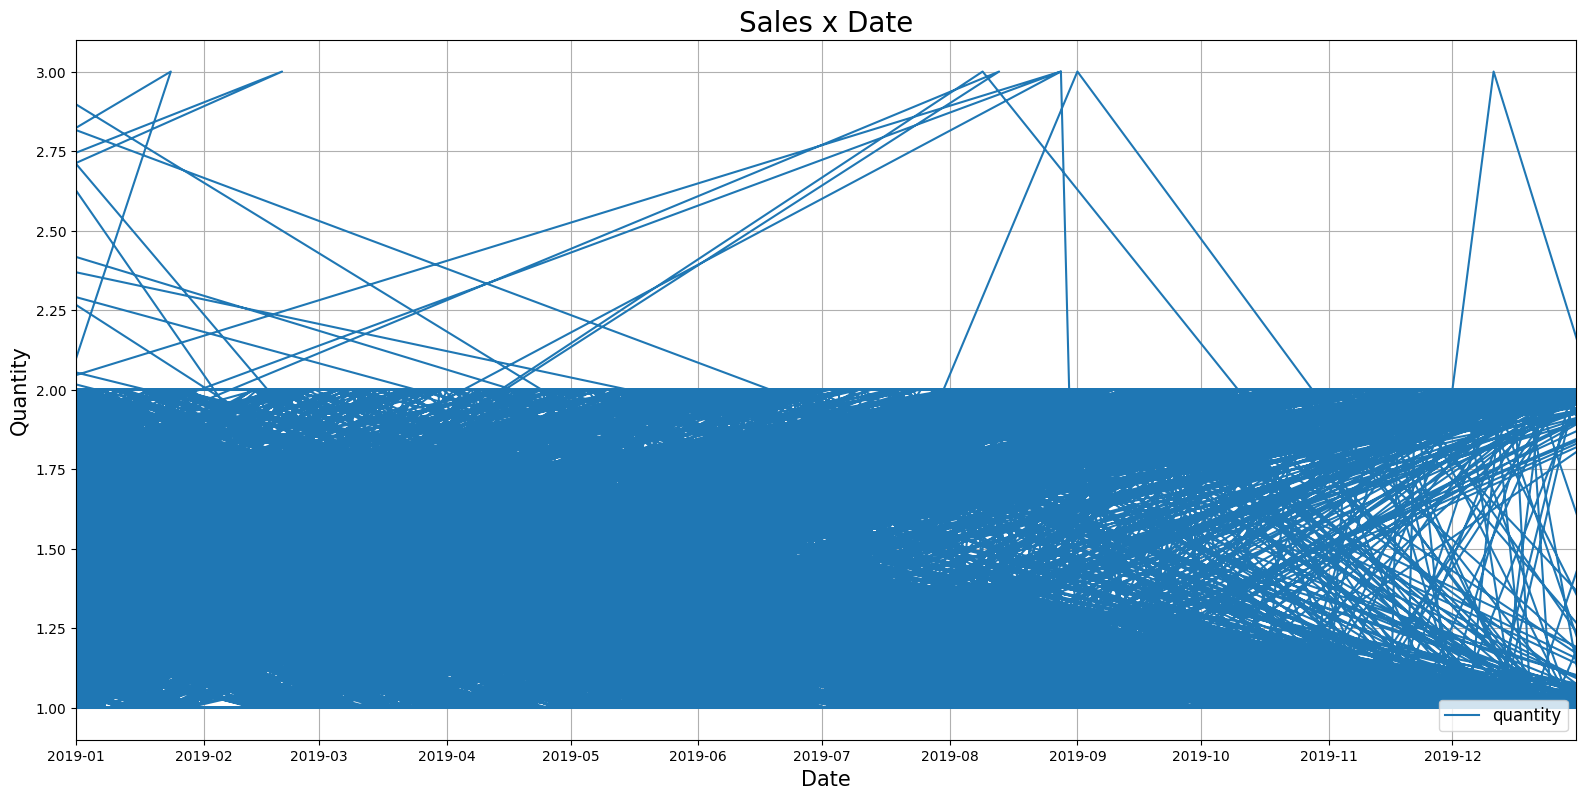

In [25]:
# vendas por ano
fig=plt.figure(figsize=(15,7))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(vendas['Date'], vendas['Quantity'])


eixo.set_title('Sales x Date', fontsize=20)
eixo.set_ylabel('Quantity', fontsize=15)
eixo.set_xlabel('Date', fontsize=15)

eixo.legend(['quantity'], loc='lower right', fontsize=12)

eixo.set_xlim(datetime.datetime(2019,1,1), datetime.datetime(2019,12,31))

eixo.grid(True)

#### Discounts

In [ ]:
# média de desconto: 9%
# menor valor de desconto: 8%
# maior valor de desconto: 10%

#### Prices

In [ ]:
# média de preço: 221.64
# menor preço: 114.80
# maior valor: 686.00

### Clients

In [ ]:
consumidores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           13650 non-null  int64         
 1   City         13650 non-null  object        
 2   State        13650 non-null  object        
 3   DateOfBirth  13650 non-null  datetime64[ns]
 4   Sex          13650 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 533.3+ KB


#### Location

In [ ]:
consumidores['City'].value_counts()

Florianópolis        3449
Rio de Janeiro       2810
Porto Alegre         2536
Curitiba             2123
São Paulo            1393
                     ... 
Cubatao                 1
Itapeva                 1
Vila velha              1
Braganca paulista       1
Ourinhos                1
Name: City, Length: 123, dtype: int64

##### Location: City

In [ ]:
consumidores['City'] = consumidores['City'].str.upper()

In [ ]:
consumidores['City'] = consumidores['City'].replace('SÃO PAULO', 'SAO PAULO')

In [ ]:
print(consumidores['City'].nunique())
print(consumidores['City'].unique())

119
['CURITIBA' 'FLORIANÓPOLIS' 'RIO DE JANEIRO' 'SAO PAULO' 'PORTO ALEGRE'
 'RIO PIRACICABA' 'LOUVEIRA' 'ITAQUAQUECETUBA' 'BELO HORIZONTE' 'IJUI'
 'GOIANIA' 'NOVA BANDEIRANTES' 'HORTOLANDIA' 'SANTO ANDRE' 'VITORIA'
 'UBERABA' 'SAO CAETANO DO SUL' 'PERUIBE' 'VICOSA' 'CACHOEIRA DO SUL'
 'LONDRINA' 'OSASCO' 'JARAGUA DO SUL' 'PARAIBANO' 'GUARULHOS'
 'CAXIAS DO SUL' 'FRANCA' 'BAURU' 'SAO GONCALO' 'PETROPOLIS' 'PALHOCA'
 'SOROCABA' 'ALTO PARAISO DE GOIAS' 'MESQUITA' 'TEOFILO OTONI' 'SALVADOR'
 'JUNDIAI' 'ARAXA' 'NOVA ESPERANCA DO SUL' 'BARBACENA' 'VERANOPOLIS'
 'PRAIA GRANDE' 'BARRA DO CORDA' 'MOGI DAS CRUZES' 'RIO DO SUL'
 'BOA VISTA' 'VASSOURAS' 'MARICA' 'SAO LOURENCO' 'ITAPETININGA'
 'SAO JOSE DOS CAMPOS' 'RONDA ALTA' 'GOVERNADOR VALADARES' 'PAULINIA'
 'ARARAQUARA' 'BRAGANCA PAULISTA' 'MACAIBA' 'ARUJA' 'CAPAO DA CANOA'
 'VILA VELHA' 'ITAPEVA' 'CUBATAO' 'MONTE MOR' 'SAO SEBASTIAO' 'ITAJOBI'
 'ANANINDEUA' 'CONTAGEM' 'SAO JOAQUIM DE BICAS' 'MIGUEL PEREIRA'
 'RIBEIRAO PRETO' 'NITEROI' 'AGUIA

##### Location: State

In [ ]:
print(consumidores['State'].nunique())
print(consumidores['State'].unique())

18
['PR' 'SC' 'RJ' 'SP' 'RS' 'MG' 'GO' 'MT' 'BH' 'ES' 'MA' 'BA' 'RR' 'RN'
 'PA' 'RO' 'MS' 'AC']


### Demography

#### Gender

In [ ]:
print('Homens: ', consumidores['Sex'].value_counts()['Homem'])
print('Mulheres: ', consumidores['Sex'].value_counts()['Mulher'])

Homens:  11972
Mulheres:  1678


#### Age

In [ ]:
print('Nascidos entre: ', consumidores['DateOfBirth'].min())
print(' e: ', consumidores['DateOfBirth'].max())

Nascidos entre:  1951-02-14 00:00:00
 e:  2001-02-07 00:00:00


### Stores

In [ ]:
lojas = pd.read_excel("lojas.xlsx")
lojas.head(10)

,ID,Name,State
0,1,Florianópolis,SC
1,2,Rio de Janeiro,RJ
2,3,Porto Alegre,RS
3,4,Curitiba,PR
4,7,São Paulo,SP
5,9,Belo Horizonte,MG
6,22,Online,na


## ML

### Data Collection

### Data Preprocessing

### Model Selection

### Model Training

### Model Evaluation

### Model Deployment